# StyleFeatureEditor For Face Manipulation

## Loading repository and enviroment

In [4]:
import os
import sys


!wget https://github.com/ninja-build/ninja/releases/download/v1.8.2/ninja-linux.zip -q
!sudo unzip ninja-linux.zip -d /usr/local/bin/ > /dev/null
!sudo update-alternatives --install /usr/bin/ninja ninja /usr/local/bin/ninja 1 --force > /dev/null

import numpy as np
from PIL import Image
from pathlib import Path
from tqdm import tqdm
import torch
import torchvision.transforms as transforms


from runners.simple_runner import SimpleRunner
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

print("✅ All imports successful! Ready to use StyleFeatureEditor.")

replace /usr/local/bin/ninja? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C
✅ All imports successful! Ready to use StyleFeatureEditor.


In [5]:
def plot_one_image(fig, pth, title, subplot_args):
  img = Image.open(pth)
  ax = fig.add_subplot(*subplot_args)
  ax.imshow(img)
  ax.set_title(title, fontsize=20)
  ax.axis('off')

In [6]:
def plot_edited_images(orig_pth, edited_pth, inversion_pth, e4e_inv_pth=None, e4e_edit_pth=None, unaligned_path=None):
    if unaligned_path is not None:
      fig_size_y = 2 + (e4e_inv_pth is not None or e4e_edit_pth is not None)
      fig_size_x = 2
    else:
      fig_size_y = 1 + (e4e_inv_pth is not None or e4e_edit_pth is not None)
      fig_size_x = 2 + (inversion_pth is not None)
    img_num = 1

    grid = gridspec.GridSpec(fig_size_y, fig_size_x)
    fig = plt.figure(figsize=(16, 8))

    plot_one_image(fig, orig_pth, "Original Image", (fig_size_y, fig_size_x, img_num))
    img_num += 1

    if unaligned_path is not None:
      plot_one_image(fig, unaligned_path, "Unaligned Image", (fig_size_y, fig_size_x, img_num))
      img_num += 1

    plot_one_image(fig, inversion_pth, "Reconstructed Image", (fig_size_y, fig_size_x, img_num))
    img_num += 1

    plot_one_image(fig, edited_pth, "Edited Image", (fig_size_y, fig_size_x, img_num))
    img_num += 1

    if e4e_inv_pth is not None:
      plot_one_image(fig, e4e_inv_pth, "e4e inversion", (fig_size_y, fig_size_x, img_num))
      img_num += 1

    if e4e_inv_pth is not None:
      plot_one_image(fig, e4e_edit_pth, "e4e editing", (fig_size_y, fig_size_x, img_num))
      img_num += 1

    plt.show()

In [9]:
runner = SimpleRunner(
    editor_ckpt_pth="pretrained_models/sfe_editor_light.pt",
)

Device: cuda:0


Loading default Discriminator from  pretrained_models/stylegan2-ffhq-config-f.pkl
Loading from checkpoint: pretrained_models/sfe_editor_light.pt
Can not find Discriminator weights in checkpoint, leave default weights.
Loading Decoder from pretrained_models/stylegan2-ffhq-config-f.pt
Loading E4E from pretrained_models/e4e_ffhq_encode.pt


### Available Editings

In [10]:
runner.available_editings()

This code handles the following editing directions for following methods:
fs_directions:
	fs_glasses
	fs_smiling
	fs_makeup
ganspace_directions:
	eye_openness
	trimmed_beard
	lipstick
	face_roundness
	nose_length
	eyebrow_thickness
	head_angle_up
	displeased
interfacegan_directions:
	age
	smile
	rotation
styleclip_directions:
	afro
	angry
	beyonce
	bobcut
	bowlcut
	curly_hair
	hilary_clinton
	depp
	mohawk
	purple_hair
	surprised
	taylor_swift
	trump
	zuckerberg
stylespace_directions:
	black hair
	blond hair
	grey hair
	wavy hair
	bangs
	receding hairline
	smiling
	sslipstick
	sideburns
	goatee
	earrings
	glasses
	wear suit
	gender

You can alse use directions from text prompts via StyleClip Global Mapper (https://arxiv.org/abs/2103.17249).
Such directions look as follows: "styleclip_global_{neutral prompt}_{target prompt}_{disentanglement}" where
neutral prompt -- some neutral description of the original image (e.g. "a face")
target prompt -- text that contains the desired edit (e.g. "

## Inference

### change age of the person

In [11]:
runner.edit(
    orig_img_pth="assets/dicaprio.png",
    editing_name=f"age",
    edited_power=9,
    save_pth="editing_res/dicaprio.png",
    align=True,
    save_inversion=True,
    use_mask=True,
    mask_trashold=0.095
)

plot_edited_images(
    orig_pth="assets/dicaprio.png",
    edited_pth="editing_res/dicaprio.png",
    inversion_pth="editing_res/dicaprio_inversion.jpg",
    unaligned_path="editing_res/dicaprio_unaligned.jpg"
)

Found 1 faces, getting the largest
Save aligned image to editing_res/dicaprio_aligned.jpg
Prepearing mask


/home/mahmoud/miniconda3/envs/sfe/lib/python3.10/site-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Done
Use mask from editing_res/dicaprio_aligned_mask.jpg
[Taichi] version 1.7.3, llvm 15.0.4, commit 5ec301be, linux, python 3.10.18
[Taichi] Starting on arch=cuda
Successfully initialize PIE equ solver with taichi-gpu backend
# of vars: 1092933
Iter 5000, abs error [ 979.52185  998.4197  1047.6631 ]
Time elapsed: 1.6692s
Successfully write image to editing_res/dicaprio_unaligned.jpg


### change hair style and color

In [17]:
runner.edit(
    orig_img_pth="assets/dicaprio.png",
    editing_name=f"grey hair",
    edited_power=9,
    save_pth="editing_res/dicaprio.png",
    align=True,
    save_inversion=True,
    use_mask=True,
    mask_trashold=0.095
)

plot_edited_images(
    orig_pth="assets/dicaprio.png",
    edited_pth="editing_res/dicaprio.png",
    inversion_pth="editing_res/dicaprio_inversion.jpg",
    unaligned_path="editing_res/dicaprio_unaligned.jpg"
)

Found 1 faces, getting the largest
Save aligned image to editing_res/dicaprio_aligned.jpg
Prepearing mask
Done
Use mask from editing_res/dicaprio_aligned_mask.jpg


Found 1 faces, getting the largest
Save aligned image to editing_res/dicaprio_aligned.jpg
Use mask from notebook/images/robert_aligned_mask.jpg


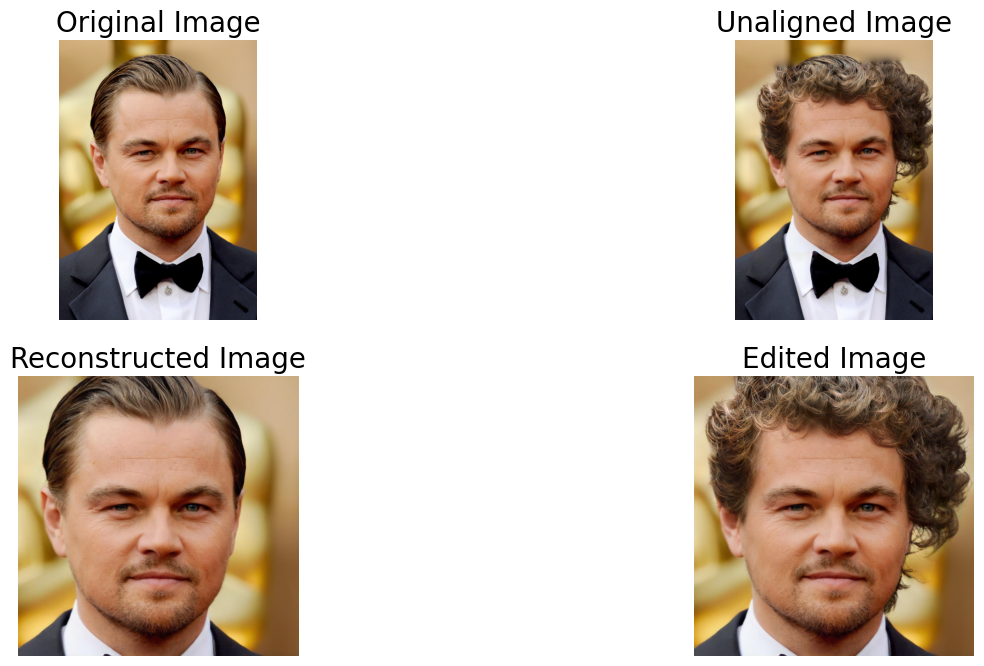

In [19]:
neutral_prompt = "face"
target_prompt = "face with curly afro"
disentanglement = 0.14
runner.edit(
    orig_img_pth="assets/dicaprio.png",
    editing_name=f"styleclip_global_{neutral_prompt}_{target_prompt}_{disentanglement}",
    edited_power=5,
    save_pth="editing_res/dicaprio.png",
    align=True,
    use_mask=True,
    mask_path="notebook/images/robert_aligned_mask.jpg",
    save_inversion=True,
)

plot_edited_images(
    orig_pth="assets/dicaprio.png",
    edited_pth="editing_res/dicaprio.png",
    inversion_pth="editing_res/dicaprio_inversion.jpg",
    unaligned_path="editing_res/dicaprio_unaligned.jpg"
)

### change facial expressions

In [22]:
runner.edit(
    orig_img_pth="assets/dicaprio.png",
    editing_name=f"fs_smiling",
    edited_power=9,
    save_pth="editing_res/dicaprio.png",
    align=True,
    save_inversion=True,
    use_mask=True,
    mask_trashold=0.095
)

plot_edited_images(
    orig_pth="assets/dicaprio.png",
    edited_pth="editing_res/dicaprio.png",
    inversion_pth="editing_res/dicaprio_inversion.jpg",
    unaligned_path="editing_res/dicaprio_unaligned.jpg"
)

Found 1 faces, getting the largest
Save aligned image to editing_res/dicaprio_aligned.jpg
Prepearing mask
Done
Use mask from editing_res/dicaprio_aligned_mask.jpg


Found 1 faces, getting the largest
Save aligned image to editing_res/dicaprio_aligned.jpg
Prepearing mask
Done
Use mask from editing_res/dicaprio_aligned_mask.jpg


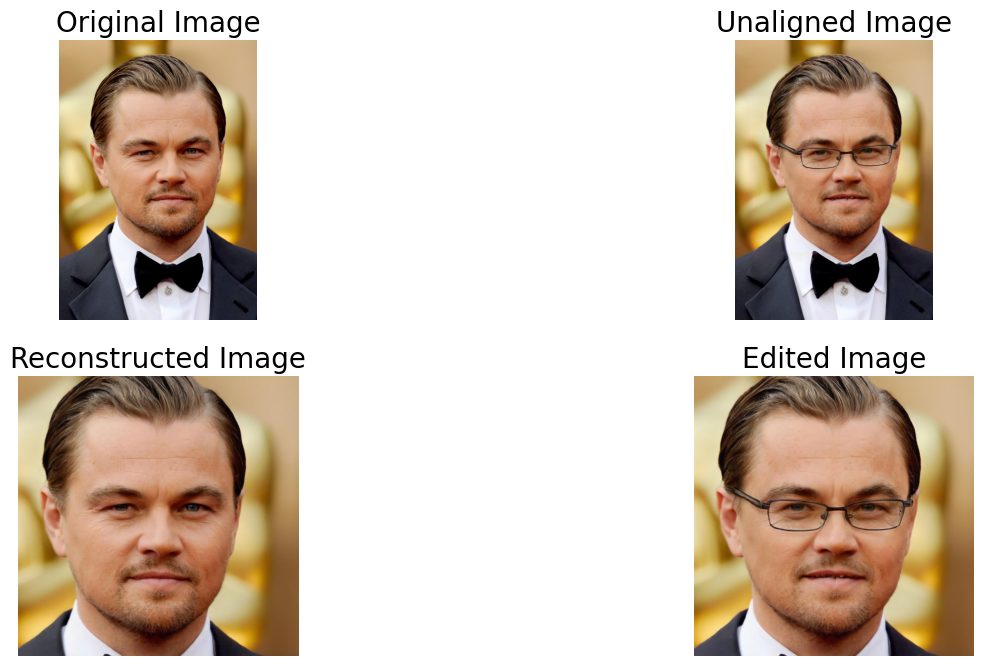

In [18]:
runner.edit(
    orig_img_pth="assets/dicaprio.png",
    editing_name=f"fs_glasses",
    edited_power=9,
    save_pth="editing_res/dicaprio.png",
    align=True,
    save_inversion=True,
    use_mask=True,
    mask_trashold=0.095
)

plot_edited_images(
    orig_pth="assets/dicaprio.png",
    edited_pth="editing_res/dicaprio.png",
    inversion_pth="editing_res/dicaprio_inversion.jpg",
    unaligned_path="editing_res/dicaprio_unaligned.jpg"
)

### change pose of the head

In [27]:
#@title smiling { display-mode: "form" }
runner.edit(
    orig_img_pth="assets/dicaprio.png",
    editing_name=f"head_angle_up",
    edited_power=9,
    save_pth="editing_res/dicaprio.png",
    align=True,
    save_inversion=True,
    use_mask=False
)

plot_edited_images(
    orig_pth="assets/dicaprio.png",
    edited_pth="editing_res/dicaprio.png",
    inversion_pth="editing_res/dicaprio_inversion.jpg",
    unaligned_path="editing_res/dicaprio_unaligned.jpg"
)

Found 1 faces, getting the largest
Save aligned image to editing_res/dicaprio_aligned.jpg


Found 1 faces, getting the largest
Save aligned image to editing_res/dicaprio_aligned.jpg


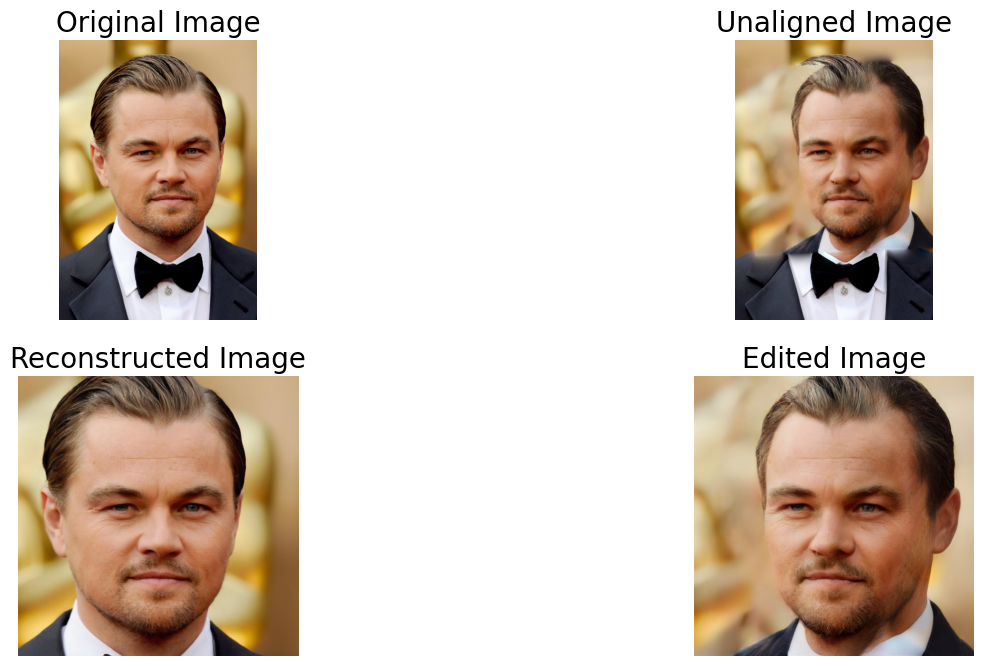

In [28]:
#@title rotation { display-mode: "form" }
runner.edit(
    orig_img_pth="assets/dicaprio.png",
    editing_name=f"rotation",
    edited_power=9,
    save_pth="editing_res/dicaprio.png",
    align=True,
    save_inversion=True,
    use_mask=False
)

plot_edited_images(
    orig_pth="assets/dicaprio.png",
    edited_pth="editing_res/dicaprio.png",
    inversion_pth="editing_res/dicaprio_inversion.jpg",
    unaligned_path="editing_res/dicaprio_unaligned.jpg"
)